# Career Booster Introduction au Deep Learning

## Séance #2b — YOLO v3

*** 

Ce notebook présente le réseau de neurones YOLO v3 devenu un standard en analyse d'images (statiques ou non) et ce en quasi temps réel. Ce réseau a déjà été entrainé et nous l'utilisons ici pour faire de l'inférence.
Il est en revanche tout à fait possible de s'en servir pour du faire du Transfer Learning (aka knowledge transfer).

## Import des bibliothèques

In [2]:
# --- Manipulation de données
import numpy as np

# --- Gestion des images
import cv2

# --- Plots
%matplotlib inline
from matplotlib import pyplot as plt

# --- Misc
import os

In [3]:
np.random.seed(42)

#### A propos de CV2

cv2 est la bibliothèque openCV (Open Source Computer Vision Library), développé à l'origine par Intel, puis maintenu par Willow Garage (entreprise de robotique) puis par Itseez (racheté par Intel).

Il s'agit d'une bibliothèque dédiée à l'analyse d'images que l'on rencontre très fréquemment dès qu'il s'agit de traiter des photos ou des vidéos (import, resizing, transformations, analyses, export).

La bibliothèque cv2 supporte l'utilisation des réseaux type DarkNet ou Yolo, d'où le nombre ici très restreint d'imports.

## 1. Import des données

In [4]:
model_path = "../models/darknet/"

### a. les noms des catégories

Ce dataset vient de la ressource "COCO" (Common Objects in COntext), qu'il est possible de trouver ici : https://cocodataset.org/#home

Voilà les principales caractéristiques de ce dataset (pris du site) : 

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images (>200K labeled)
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250,000 people with keypoints


La fonction "explore" est intéressante, n'hésitez pas à regarder : https://cocodataset.org/#explore

In [5]:
label_path = os.path.join(model_path, "data", "coco.names")
LABELS = open(label_path).read().strip().split("\n")

In [6]:
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

[Facultatif] Création d'une matrice de couleurs pour distinguer les types de bounding boxes

In [7]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

### b. les poids du réseau déjà entraîné

In [8]:
config_path = os.path.join(model_path, "cfg", "yolov3.cfg")
weights_path = os.path.join(model_path, "yolov3.weights")

### c. import de l'image à analyser

L'input du modèle est appelé un *blob*. Un blob, dans notre contexte, est un objet de type array numpy, en 4D : (image, canaux, largeur, hauteur)

In [9]:
path_to_img = "../data/images/image_test#1.jpg"

image = cv2.imread(path_to_img)
(image_height, image_width) = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
                             swapRB=True, crop=False)

## 2. Création du réseau

Nous nous servons des poids importés correspondant à une version du modèle déjà entraînée.

In [10]:
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

Nous récupérons le nom de toutes les couches pour ensuite ne garder que celles correspondant à YOLO.

In [11]:
layers_names = net.getLayerNames()

In [12]:
layers_names

['conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

Nous récupérons maintenant les 3 couches YOLO :

In [13]:
yolo_layers_names = [
    layers_names[iLayer[0] - 1]
    for iLayer in net.getUnconnectedOutLayers()
]

In [14]:
yolo_layers_names

['yolo_82', 'yolo_94', 'yolo_106']

## 3. Utilisation du réseau

#### a. Analyse de l'image

Nous pouvons maintenant envoyer l'image (le blob) dans le modèle et récupérer les prédictions effectuées.

In [15]:
net.setInput(blob)

yolo_layer_outputs = net.forward(yolo_layers_names)

#### b. Analyse des prédictions effectuées

Nous regardons maintenant ce que les couches YOLO nous renvoient.

A noter qu'il est ici nécessaire de spécifier un seuil de confiance (*confidence_thr*) pour indiquer à partir de quelle valeur de probabilité nous considérons avoir une détection.

In [16]:
for iLayer in yolo_layer_outputs:
    print(len(iLayer))

507
2028
8112


#### b' Exemple de sortie du modèle

Ci-dessous, un exemple de ce que l'on peut trouver dans les couches YOLO. Nous regardons ce qu'il se trouve dans la couche #1 et dans la détection #1307 (il y a 2028 détections effectuées par la couche #1, cf. ci-dessus).

In [17]:
example_of_layer = yolo_layer_outputs[1]
example_of_detection = example_of_layer[1307]
print(example_of_detection)

[0.746039   0.62280875 0.17399016 0.44069874 0.8720792  0.8714678
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


Les 4 premières composantes correspondent aux coordonnées de la bounding box. A noter que ces coordonnées sont organisées comme suit : (x, y, w, h), correspondant à 
- x, y : centre de la bounding box, 
- w : largeur
- h : hauteur

In [18]:
coordinates = example_of_detection[:4]
print(coordinates)

[0.746039   0.62280875 0.17399016 0.44069874]


La composante #5 correspond au critère d'"objectness", à savoir la probabilité qu'un objet soit présent dans cette bounding box. Ici, il y a 87.20% de chance que la bounding box contiennent un objet :

In [19]:
objectness_score = example_of_detection[4]
print(objectness_score)

0.8720792


Enfin, toutes les composantes suivantes correspondent aux probabilités d'appartenir à une des 80 classes (cf. variable *LABELS*). Ici, l'objet #0 a la probabilité la plus élevée (87.14%) :

In [20]:
probabilities = example_of_detection[5:]
print(probabilities)

[0.8714678 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]


Et cette composante correspond au label donné par :

In [21]:
label_of_object = LABELS[np.argmax(probabilities)]
print(label_of_object)

person


#### c. Analyse de toutes les couches

In [22]:
confidence_thr = 0.5

boxes = []
confidences = []
classIDs = []

# --- On parcoure les trois couches YOLO
for iLayer, output in enumerate(yolo_layer_outputs):

    # --- On parcoure toutes les détections, par couche
    for iOutput, detection in enumerate(output):
        
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        # --- On ne garde que les bounding boxes pour lesquelles la valeur de confiance est suffisamment élevée
        if confidence > confidence_thr:
            # print(iLayer, iOutput)
            
            # --- On réexprime les coordonnées des bounding boxes
            box = detection[0:4] * np.array([image_width, image_height, image_width, image_height])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

#### c. Non-maxima suppression (NMS)

Etape de *non-maxima suppression* destinée à supprimer les bounding boxes dites *faibles* et qui sont superposées à d'autres bounding boxes d'intérêt.

Pour en savoir plus sur l'algorithme : [lien TDS](https://towardsdatascience.com/non-maximum-suppression-nms-93ce178e177c)

In [23]:
overlap_thr = 0.3

idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_thr, overlap_thr)

In [24]:
idxs

array([[17],
       [14],
       [ 4],
       [ 6],
       [31],
       [ 2],
       [16],
       [25],
       [12]], dtype=int32)

In [25]:
assert len(idxs) > 0

#### d. Parsing des bounding boxes retenues

A partir de la liste d'index des BB retenues, nous allons pouvoir les localiser et les représenter dans l'image initiale.

In [26]:
for i in idxs.flatten():

    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])

    color = [int(c) for c in COLORS[classIDs[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


#### e. Visualisation du résultat

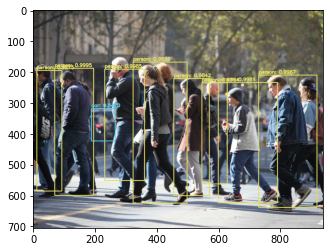

In [28]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()